In [71]:
import pandas as pd
import nba_api
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playergamelog

In [72]:
player_dict = players.get_players()
player_dict[0]

{'id': 76001,
 'full_name': 'Alaa Abdelnaby',
 'first_name': 'Alaa',
 'last_name': 'Abdelnaby',
 'is_active': False}

In [73]:
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [74]:
teams = teams.get_teams()
teams[0]

{'id': 1610612737,
 'full_name': 'Atlanta Hawks',
 'abbreviation': 'ATL',
 'nickname': 'Hawks',
 'city': 'Atlanta',
 'state': 'Georgia',
 'year_founded': 1949}

In [75]:
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

In [142]:
GSW_id = GSW['id']
GSW_id

1610612744

In [146]:
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season='ALL')
gamelog_bron

<Axes: >

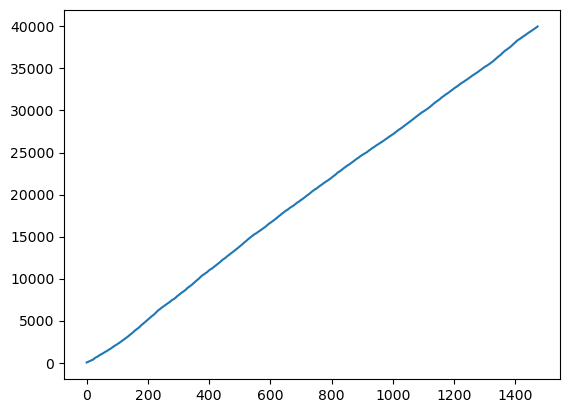

In [148]:
LeBron_allgames = pd.concat(gamelog_bron.get_data_frames(),
                            ignore_index=True, axis=0)
LeBron_allgames['GAME_DATE'] = pd.to_datetime(
    LeBron_allgames['GAME_DATE'],
    format="%b %d, %Y",
    errors="coerce")
LeBron_allgames = LeBron_allgames[['GAME_DATE', 'PTS']].sort_values(
    by="GAME_DATE").reset_index(drop=True)
LeBron_allgames["CUMPTS"] = LeBron_allgames["PTS"].cumsum()
LeBron_allgames["CUMPTS"].plot()

In [145]:
LeBron_allgames

,GAME_DATE,PTS,CUMPTS
0,2023-10-24,21,21
1,2023-10-26,21,42
2,2023-10-29,27,69
3,2023-10-30,19,88
4,2023-11-01,35,123
5,2023-11-04,24,147
6,2023-11-06,30,177
7,2023-11-08,18,195
8,2023-11-10,32,227
9,2023-11-14,16,243


NameError: name 'shape' is not defined